In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [36]:
# Load the saved CSV file
results_df = np.load("stochastic_gradient_descent_results.npy")
print(results_df.shape)

(320, 14, 3)


Note that the shape of results_df is $(M,k,4)$, where 

- $M$ is a number of parallel SGD trajectories used in the data generation process ($M = 120$ by default)
- $k$ is a number of different step sizes used during the data generation process ($k = 14$ by default)
- $4$ is a number of results: each slice contains a tuple ($\theta_n^{(\gamma}$, $\theta_n^{(2\gamma}$, $\sum_{k=n}^{2n-1}\varepsilon_{k}(\theta^{\star})$) in the notations of the paper.

In [37]:
#construct richardson-romberg estimates
RR_errr = np.zeros((results_df.shape[0],results_df.shape[1]),dtype=float)
RR_errr_new = np.zeros((results_df.shape[0],results_df.shape[1]),dtype=float)
thetas = 0.0
for i in range(len(results_df)):
    #compute the Richardson-Romberg estimator 
    RR_errr[i,:] = 2*results_df[i,:,0] - results_df[i,:,1] - thetas
    RR_errr_new[i,:] = RR_errr[i,:] + results_df[i,:,2]
#compute norm error
RR_err_norm = np.abs(RR_errr)
RR_err_norm_new = np.abs(RR_errr_new)

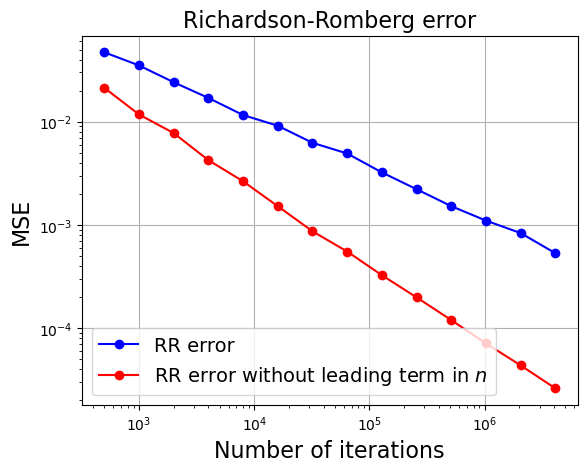

In [44]:
#visualize data
#iterations
n_powers = 14
#number of samples used in data generation process
iterations = [500 * (2**i) for i in range(n_powers)]

#plot richardson-romberg error 
plt.plot(iterations, RR_err_norm.mean(axis=0), marker='o', linestyle='-', color='b', label='RR error')
plt.plot(iterations, RR_err_norm_new.mean(axis=0), marker='o', linestyle='-', color='r', label='RR error without leading term in $n$')
# Set scales
plt.title('Richardson-Romberg error', fontsize=16) 
plt.xlabel('Number of iterations', fontsize=16)   
plt.ylabel('MSE', fontsize=16)          
plt.legend(fontsize=14)                            
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

Now we rescale the Richardson-Romberg error by the appropriate powers: $n^{1/2}$ for a standard Richardson-Romberg and $n^{3/4}$ for the Richardson-Romberg estimator with extracted leading term

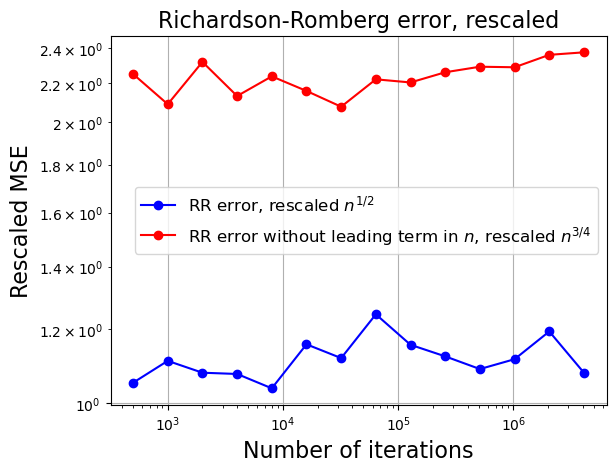

In [48]:
#plot richardson-romberg error 
plt.plot(iterations, (RR_err_norm.mean(axis=0))*np.power(iterations,0.5), marker='o', linestyle='-', color='b', label='RR error, rescaled $n^{1/2}$')
#plot richardson-romberg error for the 2nd order term
plt.plot(iterations, (RR_err_norm_new.mean(axis=0))*np.power(iterations,0.75), marker='o', linestyle='-', color='r', label='RR error without leading term in $n$, rescaled $n^{3/4}$')
# Set scales
plt.title('Richardson-Romberg error, rescaled', fontsize=16) 
plt.xlabel('Number of iterations', fontsize=16)   
plt.ylabel('Rescaled MSE', fontsize=16)          
plt.legend(fontsize=12)                            
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()